## Classification demo including training

In [1]:
#!pip install keras

In [2]:
##Import libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
## Initialising the CNN
classifier = Sequential()

In [4]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Convolution2D(64,3,3,input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))



C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()


In [5]:
## Flattening
classifier.add(Flatten())

In [6]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

fname = 'keras-cnn20.hdf5'
model.loadweights(fname)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
## Importing training data
train_set = train_datagen.flow_from_directory('dataset\\training_set',
                                               target_size=(64, 64),
                                               batch_size=6,
                                               class_mode='binary')

Found 98 images belonging to 2 classes.


In [11]:
#which is cat; which is dog? :::: labeling
label_map = (train_set.class_indices)
print(label_map)

{'cats': 0, 'dogs': 1}


In [12]:
## Importing test data
test_set = test_datagen.flow_from_directory('dataset\\test_set',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 38 images belonging to 2 classes.


In [21]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=98,
        epochs=20,
        validation_data=test_set,
        validation_steps=38)

Epoch 1/20
98/98 [==============================] - 13s 132ms/step - loss: 0.1333 - acc: 0.9490 - val_loss: 2.3961 - val_acc: 0.6058
Epoch 2/20
98/98 [==============================] - 13s 132ms/step - loss: 0.0228 - acc: 0.9932 - val_loss: 2.5343 - val_acc: 0.5882
Epoch 3/20
98/98 [==============================] - 13s 131ms/step - loss: 0.0105 - acc: 0.9983 - val_loss: 3.1012 - val_acc: 0.5962
Epoch 4/20
98/98 [==============================] - 13s 132ms/step - loss: 0.1316 - acc: 0.9575 - val_loss: 2.4291 - val_acc: 0.5490
Epoch 5/20
98/98 [==============================] - 13s 131ms/step - loss: 0.0408 - acc: 0.9932 - val_loss: 3.3041 - val_acc: 0.5000
Epoch 6/20
98/98 [==============================] - 13s 136ms/step - loss: 0.0079 - acc: 1.0000 - val_loss: 4.1928 - val_acc: 0.5588
Epoch 7/20
98/98 [==============================] - 13s 134ms/step - loss: 0.0813 - acc: 0.9745 - val_loss: 2.0569 - val_acc: 0.6106
Epoch 8/20
98/98 [==============================] - 14s 139ms/step - 

In [23]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('dataset\\single_prediction\\cat.jpg'
                           ,target_size =(64,64))


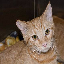

In [24]:
test_image

In [25]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [26]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

In [27]:
## Class of dog and cat

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    

In [28]:
prediction

'cat'

In [ ]:
## Saving weights

In [33]:
model_json = classifier.to_json()
with open("model20.json","w") as json_file:
    json_file.write(model_json)
classifier.save_weights("model20.h5")